<h1>Introduction</h1>

In this project, we are trying to answer the question: **What is the best neighborhood in Pittsburgh?** Our team's approach to answering this question is to define the "best" neighborhood as *the most fun* neighborhood. Before we landed on this metric, we brainstormed and discussed other potential metrics such as safety, education, cleanliness, and ease of transportation or finding housing. We explored these alternative metrics by scouring datasets on WPRDC and listing them under each potential metric. After this process, we found that the metric "fun" had the most flexibility with choosing appropriate datasets, we were interested in this metric the most.

<h1>Our Metric: Fun</h1>

How **fun** a neighborhood is can boil down into several key aspects about neighborhoods like safety, recreation, aesthetic, and ease of getting around. For our project, we've focused on one of these aspects: recreation. To quantify this, we will analyze and compare the number of *recreational city facilities* (parks, playgrounds, ballfields, courts, etc.) in each neighborhood from a PGH Department of Public Works dataset, as well as the *distinct types* of some of these recreational facilities. We will also quantify recreation by analyzing a dataset of *pools in each neighborhood* and compare these numbers from each neighborhood from a City of Pittsburgh dataset.

# Ranking Neighborhoods By Pools And Spray Parks 
As a part of our metric we belive that a great neighbor hood should have access to many pools as pools have always been known to correspond to happiness.

In [50]:
import sys
import pandas as pd
!{sys.executable} -m pip install geopandas --user
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
!{sys.executable} -m pip install folium --user
from folium.plugins import HeatMap

import folium


In [7]:
pools = pd.read_csv("https://data.wprdc.org/datastore/dump/5cc254fe-2cbd-4912-9f44-2f95f0beea9a")
pools.head(3)

,_id,id,name,type,retired,water_source,capacity,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,899591542,Ammon,Pool,NaN,Pittsburgh Water and Sewer Authority,538000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.448728,-79.978329
1,2,1003800828,Banksville,Pool,NaN,Pennsylvania American Water,166320.0,https://tools.wprdc.org/images/pittsburgh/pool...,Banksville,2,20,42003202300,5,20,6,4-9,40.414766,-80.040555
2,3,1688544652,Beechview Spray Park,Spray Park,NaN,Pennsylvania American Water,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Beechview,4,19,42003191600,5,19,6,4-28,40.414997,-80.019173


lets clean up the data a bit so only what is important appears.

In [57]:
total = pools.groupby(["neighborhood","type"]).size().reset_index(name="Count").sort_values(by="Count", ascending=True)
total.head(5)

,neighborhood,type,Count
0,Allegheny Center,Pool,1
23,Squirrel Hill South,Pool,1
22,South Side Slopes,Spray Park,1
20,Sheraden,Pool,1
19,Shadyside,Spray Park,1


lets pivot the values so it's clear what types of water actvities each neighborhood offers

In [100]:
pivot = total.pivot(index="neighborhood", columns="type", values="Count").fillna(0).astype(int).sort_values(by="Pool", ascending=False)
pivot

type,Pool,Spray Park
neighborhood,,
Highland Park,2,0
South Side Flats,2,0
Allegheny Center,1,0
Squirrel Hill South,1,0
Sheraden,1,0
Polish Hill,1,0
Perry North,1,0
Mount Washington,1,0
Lincoln Place,1,0


next let's make a bar graph to help visualize the result.

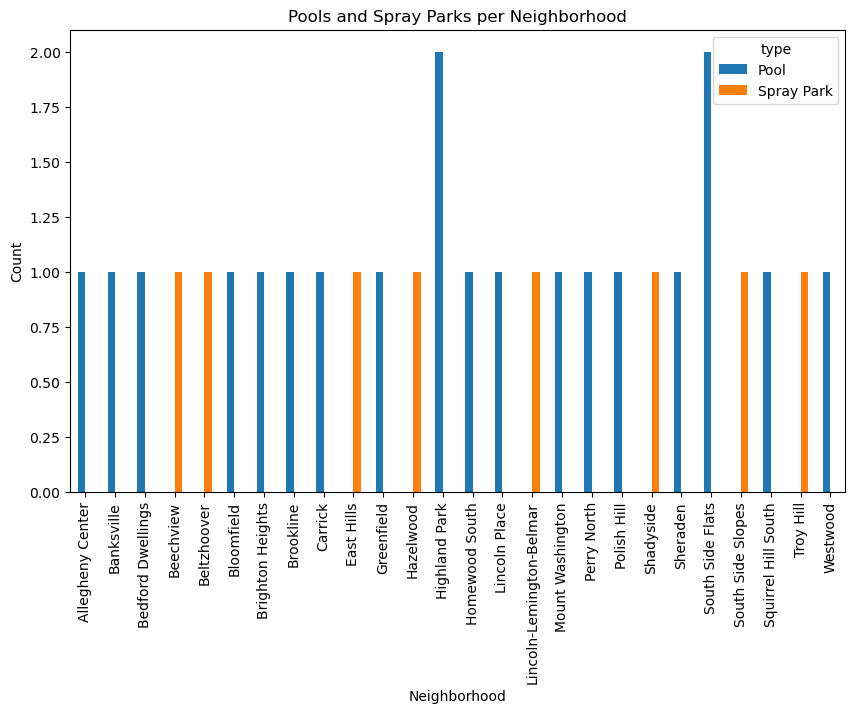

In [92]:
pivot.plot(kind='bar', stacked=False, figsize=(10, 6)) #converting data from last cell to plot

# Add labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.
plt.title('Pools and Spray Parks per Neighborhood')

# Show graph
plt.show()


Using Geo pandas to create a map of the density of pools in the area

In [52]:
latitude = pools['latitude'].mean()#setting base location for the map
longitude = pools['longitude'].mean()
m = folium.Map(location=[latitude, longitude], zoom_start=12)
heat_data = [[row['latitude'], row['longitude']] for index, row in pools.iterrows()]# Adding points to the map

HeatMap(heat_data).add_to(m)
m # displays map



## Conclusion based of pool data
After interpeting the data I found that Highland Park and South Flats had the greatest number of Pools in their neighborhood. With Squirrel Hill South, Allegheny Center, and Sheraden not far behind. Overall many of the neighborhoods in Pittsburgh have atleast 1 pool or spray park so I don't think the number of pools needs to be weighed very high in the metric as long as atleast one pool is present. Still there are signifcant advantages to having two Pools.


<h1>Sub-Metric: City Recreational Facilities</h1>
<h3>Madelyn Dayrit</h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read and load file into biggy
#biggy = pd.read_csv(r"C:\Users\MED255\Downloads\cityfacilities.csv")
biggy = pd.read_csv(r"https://data.wprdc.org/datastore/dump/fbb50b02-2879-47cd-abea-ae697ec05170")
# print information
biggy.info()

# display unique types of places and amount of unique types
print(str(len(biggy["type"].unique())))
print(biggy["type"].unique())

# display unique neighborhoods and amount of neighborhohods
print(str(len(biggy['neighborhood'].unique())))
print(biggy['neighborhood'].unique())



# use query masks to count number of recreation related facilities per neighborhood

# query mask for rec centers
qm_rec = biggy['type'].str.contains('Rec Center', regex = False)

# query mask for pool/rec
qm_poolrec = biggy['type'].str.contains('Pool/Rec', regex = False)

# query mask for activity facilities
qm_activity = biggy['type'].str.contains('Activity', regex = False)

# query mask for pool facilities
#qm_pool = biggy['type'].str.contains('Pool', regex = False)

# query mask for park shelters
qm_shelter = biggy['type'].str.contains('Shelter', regex = False)

# query mask for baseball dugouts
qm_dugout = biggy['type'].str.contains('Dugout', regex = False)

# query mask for community centers
qm_community = biggy['type'].str.contains('Community', regex = False)

# query mask for concession stands
qm_concession = biggy['type'].str.contains('Concession', regex = False)

# query mask for rentable cabins
qm_cabin = biggy['type'].str.contains('Cabin', regex = False)

# query mask for closed pools
#qm_poolclosed = biggy['type'].str.contains('Pool Closed', regex = False)

# query mask for active facilities
qm_active = biggy['inactive'].str.contains('f', regex = False)



# create dataframe of active rec-related facilities
#rec_related_df = biggy[qm_active & (qm_rec|qm_poolrec|qm_activity|qm_pool|qm_shelter|qm_dugout|qm_community|qm_cabin|qm_poolclosed|qm_concession)]
rec_related_df = biggy[qm_active & (qm_rec|qm_poolrec|qm_activity|qm_shelter|qm_dugout|qm_community|qm_cabin|qm_concession)]

# save rec related dataframe as csv to view
rec_related_df.to_csv("rec_related_df_.csv", index=False)

# count rec facilities by neighborhood
neighborhood_counts = rec_related_df['neighborhood'].value_counts()

# isolate top 10 neighborhoods with highest counts
top_10 = neighborhood_counts.nlargest(10)

# plot a barplot
top_10.plot(kind = 'bar', color = 'grey', width = 0.8)

# format plot
plt.xlabel('Neighborhoods')
plt.ylabel('# of Recreational Facilities')
plt.title('Top 10 Counts of Rec Facilities in Pittsburgh Neighborhoods')

y_axis_steps = np.arange(0, top_10.max() + 2, step = 2)
plt.yticks(y_axis_steps)
plt.xticks(fontsize = 10)

# display plot
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    412 non-null    int64  
 1   id                     412 non-null    int64  
 2   parcel_id              402 non-null    object 
 3   inactive               401 non-null    object 
 4   name                   412 non-null    object 
 5   rentable               412 non-null    object 
 6   type                   412 non-null    object 
 7   primary_user           412 non-null    object 
 8   address_number         257 non-null    float64
 9   street                 398 non-null    object 
 10  zip                    230 non-null    float64
 11  image                  394 non-null    object 
 12  neighborhood           411 non-null    object 
 13  council_district       412 non-null    int64  
 14  ward                   411 non-null    float64
 15  tract 

NameError: name 'qm_pool' is not defined

type
Shelter       12
Activity       2
Cabin          2
Concession     1
Pool           1
Name: count, dtype: int64


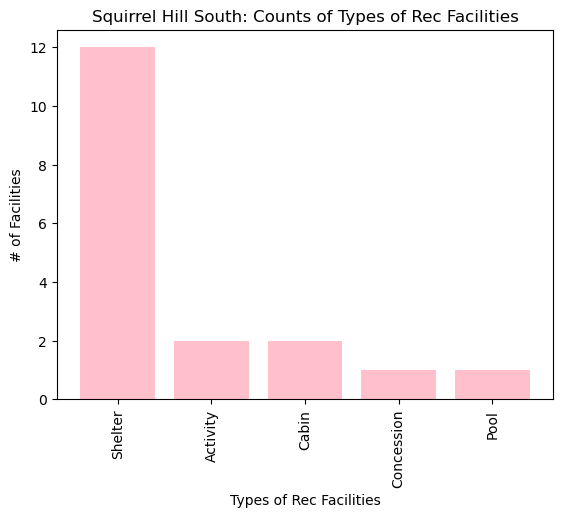

In [ ]:
# now lets look at the distribution of different types of rec facilities in the top 4 neighborhoods

# first is Squirrel Hill South

# isolate Squirrel Hill South rec-facility data using query mask
qm_shs = rec_related_df['neighborhood'].str.contains("Squirrel Hill South", regex = False)
shs_df = rec_related_df[qm_shs]

# count each type of facility
shs_type_counts = shs_df['type'].value_counts()

# display counts of each type
print(shs_type_counts.head(10))

# plot different types
shs_type_counts.plot(kind = 'bar', color = 'pink', width = 0.8)
plt.xlabel('Types of Rec Facilities')
plt.ylabel('# of Facilities')
plt.title('Squirrel Hill South: Counts of Types of Rec Facilities')

# display plot
plt.show()


type
Dugout        7
Concession    3
Shelter       3
Pool          2
Rec Center    1
Pool/Rec      1
Name: count, dtype: int64


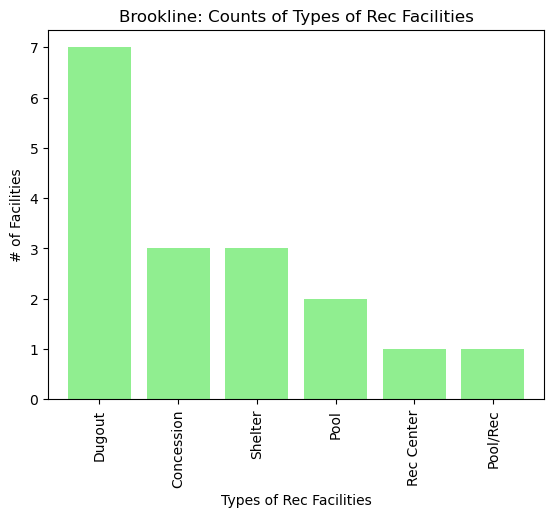

In [ ]:
# second is Brookline

# isolate Brookline rec-facility data using query mask
qm_bkl = rec_related_df['neighborhood'].str.contains("Brookline", regex = False)
bkl_df = rec_related_df[qm_bkl]

# count each type of facility
bkl_type_counts = bkl_df['type'].value_counts()

# display counts of each type
print(bkl_type_counts.head(10))

# plot different types
bkl_type_counts.plot(kind = 'bar', color = 'lightgreen', width = 0.8)
plt.xlabel('Types of Rec Facilities')
plt.ylabel('# of Facilities')
plt.title('Brookline: Counts of Types of Rec Facilities')

# display plot
plt.show()

type
Shelter       8
Dugout        2
Concession    1
Pool          1
Cabin         1
Name: count, dtype: int64


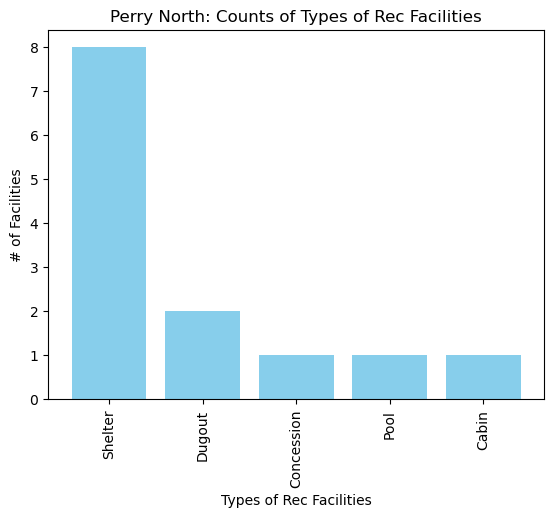

In [ ]:
# third is Perry North

# isolate Perry North rec-facility data using query mask
qm_pyn = rec_related_df['neighborhood'].str.contains("Perry North", regex = False)
pyn_df = rec_related_df[qm_pyn]

# count each type of facility
pyn_type_counts = pyn_df['type'].value_counts()

# display counts of each type
print(pyn_type_counts.head(10))

# plot different types
pyn_type_counts.plot(kind = 'bar', color = 'skyblue', width = 0.8)
plt.xlabel('Types of Rec Facilities')
plt.ylabel('# of Facilities')
plt.title('Perry North: Counts of Types of Rec Facilities')

# display plot
plt.show()

type
Shelter     10
Activity     1
Cabin        1
Pool         1
Name: count, dtype: int64


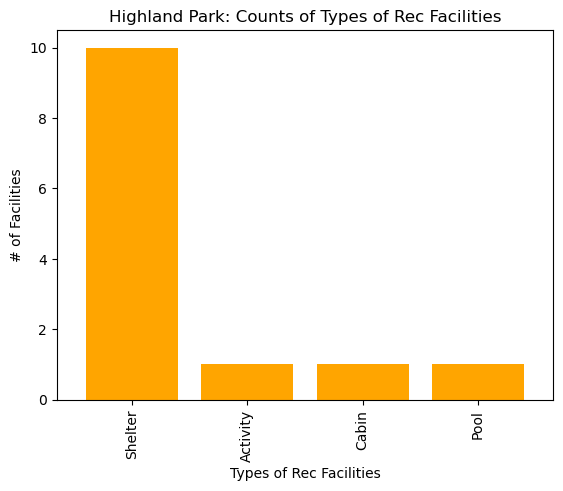

In [ ]:
# fourth is Highland Park

# isolate Highland Park rec-facility data using query mask
qm_hpk = rec_related_df['neighborhood'].str.contains("Highland Park", regex = False)
hpk_df = rec_related_df[qm_hpk]

# count each type of facility
hpk_type_counts = hpk_df['type'].value_counts()

# display counts of each type
print(hpk_type_counts.head(10))

# plot different types
hpk_type_counts.plot(kind = 'bar', color = 'orange', width = 0.8)
plt.xlabel('Types of Rec Facilities')
plt.ylabel('# of Facilities')
plt.title('Highland Park: Counts of Types of Rec Facilities')

# display plot
plt.show()

# Winner: Squirrel Hill South
### Runner Ups
2. **Brookline**
3. **Perry North**
4. **Highland Park**

# Conclusion
When we first decided on this metric, I personally thought that the winner would be Strip District, Squirrel Hill, or Oakland. From personal experience, I've gotten to explore these neighborhoods the most and had the most fun in them. It wasn't too much of a surprise that Squirrel Hill came out on top, because I know it's a big neighborhood, and theres alot to explore in the area from restaurants to shops to little parks. I'm most surprised by the runner-ups in my data-driven report. I feel like I haven't heard much at all about Brookline or Perry North, let alone how "fun" they are. Highland Park sounded familiar, but I definitely haven't heard anything about how fun the neighborhood is.

Something important I'd like to note about my report is that the dataset I was working with had some flaws. Since some of the facilities encompassed multiple "types" of rec facilities like dugout, shelter, rec center there were some inconsistencies with repeated name entries with different types, or some entries mislabelled with a different type altogether. I tried to minimize this error by narrowing down the types of facilities I was looking for, in the hopes of getting a more accurate count for each neighborhood. Another flaw about the dataset is that there was a "pool/rec" type, another "pool" type, and a "rec" center type. This overlap in facility type caused some issues in a few neighborhoods with count, but it wasn't widespread enough to significantly impact results. To be sure of this, I took the top four neighborhoods with the most recreational facilities, and created individual bar plots for each to look at specific counts for each type of facility. From this, I determined Pool/Rec, Pool, and Rec type facilities didn't significantly impact the outcome of the neighborhood with the most rec facilities.


<h1>The Best Neighborhood: Squirrel Hill South </h1>

# Conclusions

### Anthony

I live 30 minutes away from pittsburgh in upper st clair and intill this year I really have not been to the city very many times so I did not know much about the different neighborhoods however from the times that I have passed through  neighborhood I find it quite easy to believe that it is one of the better ones in pittsburgh. From what I remember all of the house seemed well maintained and it was Overall a nice location.

### Winter

I was surprised at the breadth of different public activities available to people in every neighborhood of Pittsburgh, and I was also surprised that Squirrel Hill South consistently came up above most other neighborhoods by comparison despite it not being the most populated area.

### Madelyn

When we first decided on this metric, I personally thought that the winner would be Strip District, Squirrel Hill, or Oakland. From personal experience, I've gotten to explore these neighborhoods the most and had the most fun in them. It wasn't too much of a surprise that Squirrel Hill came out on top, because I know it's a big neighborhood, and theres alot to explore in the area from restaurants to shops to little parks. I'm most surprised by the runner-ups. I feel like I haven't heard much at all about Brookline or Perry North, let alone how "fun" they are. Highland Park sounded familiar, but I definitely haven't heard anythig about how fun the neighborhood is.